# Introduction-to- Scikit Learn

Index:
0. An end-end to scikit learn workflow
1. Getting the data ready
2. Choose the right estimator\algorithm
3. Fit the model\algorithm and use it to predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together !!

In [2]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end to end Scikit- learn Workflow

In [28]:
import numpy as np

In [12]:
# 1. Get the data ready 
import pandas as pd
heart_disease = pd.read_csv("data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
# Create a X (feature Matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [31]:
# Band-aid Solution not correct way until very sure
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Choose the right model and hyper parameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep thedefault hyper parameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [34]:
clf.fit(X_train, y_train);

In [35]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [37]:
# 4. Evaluate the model

clf.score(X_train, y_train)

1.0

In [38]:
clf.score(X_test, y_test)

0.8524590163934426

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [40]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [41]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [42]:
#5. Improva a model 
# try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model Accuracy on test test : {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model Accuracy on test test : 85.25%

Trying model with 20 estimators...
Model Accuracy on test test : 80.33%

Trying model with 30 estimators...
Model Accuracy on test test : 83.61%

Trying model with 40 estimators...
Model Accuracy on test test : 80.33%

Trying model with 50 estimators...
Model Accuracy on test test : 86.89%

Trying model with 60 estimators...
Model Accuracy on test test : 83.61%

Trying model with 70 estimators...
Model Accuracy on test test : 83.61%

Trying model with 80 estimators...
Model Accuracy on test test : 83.61%

Trying model with 90 estimators...
Model Accuracy on test test : 81.97%



In [43]:
#6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [44]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

In [45]:
clf.fit(X_train, y_train);

In [46]:
import sklearn 
sklearn.show_versions()


System:
    python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\RK Niranjan\Desktop\sample_project_1\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3
   setuptools: 68.0.0
        numpy: 1.26.0
        scipy: 1.11.3
       Cython: None
       pandas: 2.1.1
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\RK Niranjan\Desktop\sample_project_1\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\RK Niranjan\Desktop\sample_project_1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


## Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split data into features and labels(usually 'X' and 'y')
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting non-numerical values to numerical values(also called feature encoding)

In [47]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [50]:
# Split the data into training and test_sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [52]:
X.shape

(303, 13)

In [53]:
len(heart_disease)

303

In [54]:
X.shape[0] * 0.8

242.4

In [55]:
242 + 61

303

# Data Science Tip : 
 Clean Data -> Transform Data -> Reduce Data

# 1.1 Make sure its numerical

In [56]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [57]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [58]:
len(car_sales)

1000

In [59]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [60]:
# Split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [62]:
# String to numbers using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categories_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [63]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [64]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [65]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

In [66]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [67]:
# Let's refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values ?

1. Fill with some values (also known as imputation).
2. Remove the samples with missing data altogether.

There is no good way in this

In [69]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [70]:
# Create X and y

X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [71]:
# Let's convert our data to numbers
# String to numbers using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categories_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [72]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


### Option 1 : Fill missing data with pandas

In [73]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [74]:
# Fill the Make column
car_sales_missing["Make"].fillna("misisng",inplace=True)

#Fill Colour Column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill Odomete(KM) Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fills the door Column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [75]:
# Check your dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [76]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [77]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [78]:
len(car_sales_missing)

950

In [79]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [80]:
# Let's convert our data to numbers
# String to numbers using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categories_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing values with scikit learn

In [81]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [82]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [83]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [84]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [85]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [86]:
# Fill missing the values with Sci-kit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill in the Categorical with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer(something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [87]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming X_train and X_test are NumPy arrays
# Convert them to DataFrames
X_train_df = pd.DataFrame(X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
X_test_df = pd.DataFrame(X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Fill missing values with Scikit-Learn
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train_df)
filled_X_test = imputer.transform(X_test_df)

# Check filled X_train
print(filled_X_train)


In [88]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming X_train and X_test are NumPy arrays
# Convert them to DataFrames
X_train_df = pd.DataFrame(X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
X_test_df = pd.DataFrame(X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Fill missing values with Scikit-Learn
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train_df)
filled_X_test = imputer.transform(X_test_df)

# Check filled X_train
print(filled_X_train)


ValueError: Shape of passed values is (800, 13), indices imply (800, 4)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming X_train and X_test are NumPy arrays
# Convert them to DataFrames
X_train_df = pd.DataFrame(X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
X_test_df = pd.DataFrame(X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Print columns to debug
print("Columns of X_train_df:", X_train_df.columns)
print("Columns of X_test_df:", X_test_df.columns)

# Fill missing values with Scikit-Learn
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train_df)
filled_X_test = imputer.transform(X_test_df)

# Check filled X_train
print(filled_X_train)


## 2. Choosing the right estimator/algorithm for your problem
Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
* Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)
* If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regession problem

In [93]:
## Get California Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [94]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [95]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [96]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house price in $100,000s



#Split the data and test  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model on the test set
model.score(X_test, y_test)

In [ ]:
# Import algorithm/estimator

from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

#Set up random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split the data into data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on training set)
model = Lasso()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

In [ ]:
# Import the algorithm/estimator
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
#set up the random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on training set)
model = ElasticNet()
model.fit(X_train, y_train)

#Check the score of the model on the test set
model.score(X_test, y_test)

In [ ]:
# Import the algorithm/estimator
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
#set up the random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on training set)
model = SVR()
model.fit(X_train, y_train)

#Check the score of the model on the test set
model.score(X_test, y_test)

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [98]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split into train and test cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 picking a ML model for a classification problem

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [100]:
# housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

In [101]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [102]:
#housing_df["target"] = housing["target"]
#housing_df.head()

iris_df["target"] = iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [93]:
# Import the algorithm for classification problem

from sklearn import svm
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = iris_df.drop("target",axis=1)
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

# model = svm()
model = svm.SVC(kernel='linear') 

model.fit(X_train, y_train)

# model.score(X_test, y_test)
accuracy = model.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9703703703703703


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = iris_df.drop("target",axis=1)
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = GaussianNB()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Accuracy : ", accuracy)

Accuracy :  0.9866666666666667


In [105]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

X = iris_df.drop("target",axis=1)
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Accuracy of KNeighborsClassifier :", accuracy)

Accuracy of KNeighborsClassifier : 0.9466666666666667


In [108]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says try `LinearSVC`.

In [114]:
# Import the LinaearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.47368421052631576

In [111]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [115]:
# Suppose Not a good percentage we move to RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8289473684210527

### Tidbit:
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

##  3. Fit the model/algorithm on our data and use it to make prediction
###  3.1 Fitting the model to the data

Different names for : 
   * `X` = features, features variables, data
   * `y` = labels, targets, target variables, ground truth

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8289473684210527

In [117]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [119]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using :

    Random Forest Wikipedia
    Random Forest Wikipedia (simple version)
    Random Forests in Python by yhat
    An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

## 3.2 Make predictions using a machine learning model

2 ways to make predictions(more are there):

    1. `predict()`
    2. `predict_proba()`

In [123]:
# Use a trained model to make predictions

clf.predict(np.array([1, 3, 4, 5, 6])) # This willnot work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [125]:
X_test.shape

(152, 13)

In [126]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [128]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]],
      dtype=int64)

In [129]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8289473684210527

In [130]:
clf.score(X_test, y_test)

0.8289473684210527

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8289473684210527

Make predictions with `predict_proba()`

In [132]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.47, 0.53],
       [0.89, 0.11],
       [0.35, 0.65]])

In [133]:
# Lets predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [134]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [135]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [136]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [138]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [139]:
y_test[:10]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: target, dtype: float64

In [140]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [141]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [142]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

   1. Estimator's built-in `score()` method
   2. The `scoring` parameter
   3. Problem-specific metric functions
   
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating a model with the `score` method

In [156]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=15000)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15000)

In [157]:
clf.score(X_test, y_test)

0.8688524590163934

In [158]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

Let's use the `score()` on our regression problem...

In [167]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [162]:
model.score(X_test, y_test)

0.7000978702214974

In [165]:
model.score(X_train, y_train)

0.9084003051633126

In [168]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the`scoring` parameter

In [169]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [172]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [173]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.83333333,
       0.86666667, 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [174]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
#Default scoring paramter of classifier = mean accuracy
clf.score()

In [175]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. confusion matrix
4. Classification report

**Accuracy**

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# X_train, X_test, y_train, y_test
clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [105]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [106]:
print(f"Heart Disease Classifier Cross - Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross - Validated Accuracy : 82.48%


**Area Under the receiver operating characteristic curve (AUC/ROC)**

* Area Under Curve(AUC)
* ROC curve

ROC curves are comparision of a model's true positive rate(tpr) versus a models false positive rate(fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [107]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] , len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [109]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [110]:
# Calculate fpr, tpe, thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

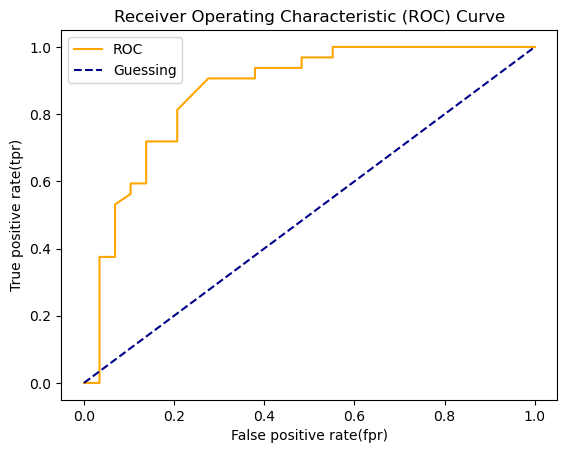

In [111]:
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    
    """
    
    # Plot ROC curve 
    plt.plot(fpr, tpr , color="orange", label="ROC")
    
    # plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [112]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

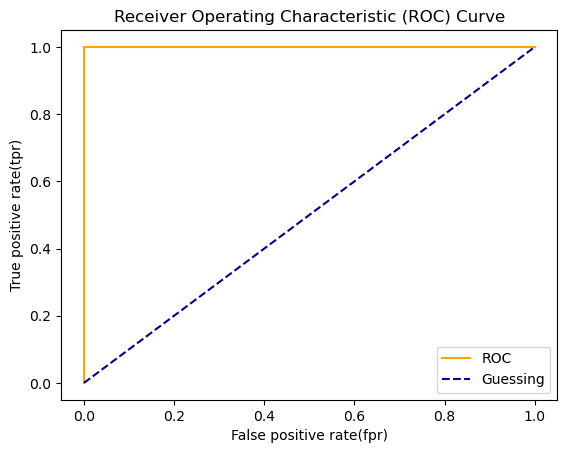

In [113]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [114]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [115]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [116]:
# Visualize the confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
           rownames=["Actual Label"],
           colnames=["Predictive Labels"])

Predictive Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [117]:
24+5+4+28

61

In [118]:
len(y_preds), len(X_test)

(61, 61)

### Creating a confusion matrix using Scikit-Learn
Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), 
features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y 
by displaying a confusion matrix.
2. sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels 
and compares them by displaying a confusion matrix.

Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

import sklearn
sklearn.__version__
If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

import sys
!conda install --yes --prefix {sys.prefix} seaborn

import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

ans.heatmap(conf_mat);

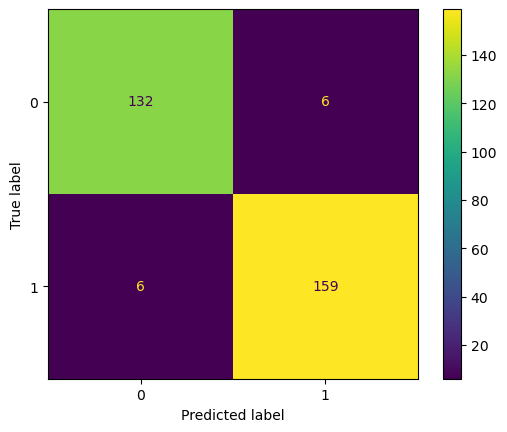

In [119]:
# Make a confusion matrix more visual with more seaborn heatmap

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [120]:
import sklearn
sklearn.__version__

'1.3.0'

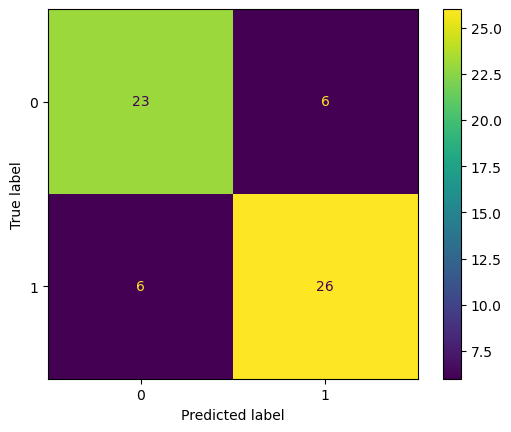

In [121]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

In [122]:
import seaborn as sns

sns.set(font_scale=1.5) conf_mat = confusion_matrix(y_test, y_preds)

ans.heatmap(conf_mat);

SyntaxError: invalid syntax (1266981407.py, line 3)

**Classification Report**

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [124]:
# Where precision and recall bacome valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                      disease_preds,
                                      output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


###  4.2.2 Regression and model evaluation merics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

### R^2

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [125]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
model.score(X_test, y_test)

0.8065734772187598

In [127]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [128]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [129]:
y_test.mean()

2.0550030959302323

In [130]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [131]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [133]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [134]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It goves you an idea of how wrong your model predictions are.

In [135]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds) # True value to predicted value
mae

0.32659871732073664

In [138]:
df = pd.DataFrame(data={"actual values" : y_test,
                        "predicted values" : y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [142]:
# MAE using formulae and differences
np.abs(df["differences"]).mean() # formula for mae

0.32659871732073664

### Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [143]:
# Mean squared error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [144]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [145]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [154]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differnces"] = 16

In [155]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [156]:
# Calculate MSE with large error

df_large_error["squared_differences"].mean()

0.2534678520824551

In [157]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [158]:
df_large_error["squared_differences"].mean()

0.7295421709146245

### 4.2.3 Finally using the `scoring` parameter

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [160]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5,scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is uesd()
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [161]:
# Cross validated accuracy
print(f"The cross-validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is :82.48%


In [162]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [163]:
# Cross validated accuracy
print(f"The cross-validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is :82.48%


In [167]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [169]:
# Cross-validated Precision
print(f"The cross-validated accuracy is :{np.mean(cv_acc)}")

The cross-validated accuracy is :0.8248087431693989


In [170]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [171]:
# Cross-validated Recall
print(f"The cross-validated accuracy is :{np.mean(cv_recall)}")

The cross-validated accuracy is :0.8545454545454545


In [172]:
# F1 Metric
np.random.seed(42)
cv_fone = cross_val_score(clf, X, y, scoring="f1")
cv_fone

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [174]:
# Cross-validated F1
print(f"The cross-validated accuracy is :{np.mean(cv_fone)}")

The cross-validated accuracy is :0.8426854603423346


In [176]:
# Cross-validated top_k_accuracy
np.random.seed(42)
cv_topk = cross_val_score(clf, X, y,cv=5 ,  scoring="top_k_accuracy")
cv_topk

array([1., 1., 1., 1., 1.])

In [177]:
# Cross-validated top_k_accuracy
print(f"The cross-validated accuracy is :{np.mean(cv_topk)}")

The cross-validated accuracy is :1.0


In [179]:
# Cross-validated neg_brier_score
np.random.seed(42)
cv_negbs = cross_val_score(clf, X, y,cv=5, scoring="neg_brier_score")
cv_negbs

array([-0.13464098, -0.09323443, -0.13290492, -0.13219667, -0.15676833])

In [180]:
# Cross-validated neg_brier_score
print(f"The cross-validated accuracy is :{np.mean(cv_negbs)}")

The cross-validated accuracy is :-0.12994906557377045


Let's see the `scoring` parameter being used for a regression problem....

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [187]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [184]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [188]:
# Mean Squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [190]:
# Mean across_val_score_score error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48439810187984494

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)
# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the model using evaluations functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

NameError: name 'heart_disease' is not defined

In [194]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluations functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


In [195]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [6]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100)

In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

In [8]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [9]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision" : round(precision,2),
                   "recall" : round(recall, 2),
                   "f1" : round(f1, 2)}
    
    print(f"Acc : {accuracy*100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return metric_dict

In [13]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Splitinto X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70 % of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))  # 15 % of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc : 82.22%
Precision : 0.81
Recall : 0.88
F1 Score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [14]:
np.random.seed(42)

# Create a second classifier with different hyper-parameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyper-paramter
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd Classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc : 82.22%
Precision : 0.84
Recall : 0.84
F1 Score : 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [15]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}  # Not some random numbers . It makes sense through documentation reading


np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _val

In [16]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [17]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [18]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [19]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _val

In [21]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [22]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


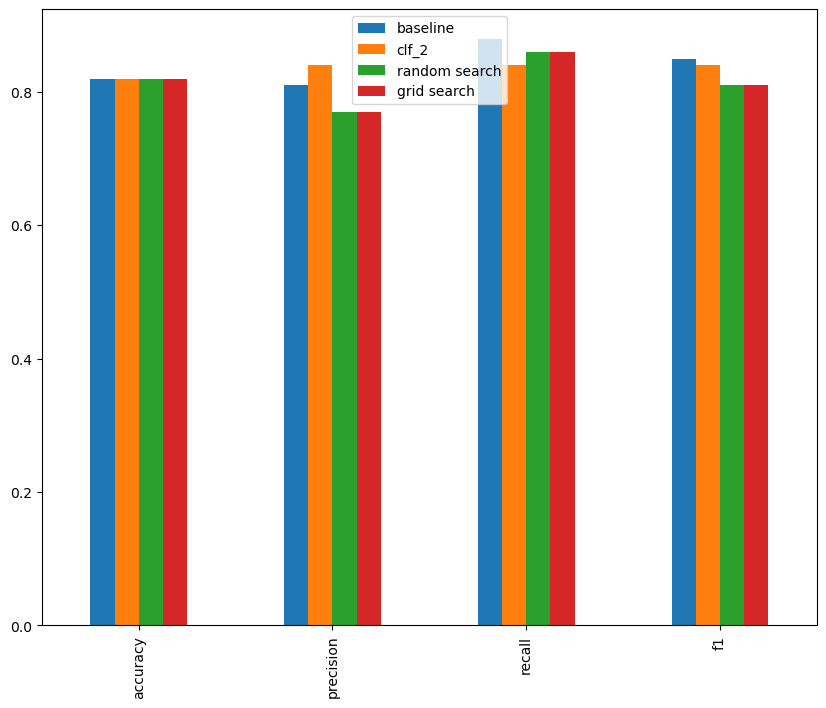

In [23]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's pickle module
2. With the joblib module

**Pickle**

In [24]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [25]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [26]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [27]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [28]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [29]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together !!

In [30]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [31]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [32]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [47]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)


# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)



#Define the different features and transformer- pipeline

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])



# Setup the preprocessing steps (fill the missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_feature)
                    ])


# Creating a preprocessing and modelling pipeline

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline.

In [57]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\RK Niranjan\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [55]:
# gs_model.fit(X_train, y_train)
gs_model.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']